In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
pip install numpy pandas matplotlib seaborn tldextract wordcloud jovian  --upgrade

In [357]:
%matplotlib inline
import datetime
import json
import tldextract
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib

from urllib.request import urlretrieve

In [358]:
sns.set_style("darkgrid")

In [359]:
urlretrieve('https://raw.githubusercontent.com/okoliechykwuka/Streamlit-App/master/BrowserHistory.json','BrowserHistory.json')

('BrowserHistory.json', <http.client.HTTPMessage at 0x7ff08bcdad60>)

In [360]:
with open("BrowserHistory.json") as f:
    data = json.loads(f.read())
    df = pd.DataFrame(data["Browser History"])
# A possible param if differentiation is needed b/w different clients
df.drop('client_id', axis=1, inplace=True)
df.drop('favicon_url', axis=1, inplace=True)
df.tail(2)

,page_transition,title,url,time_usec
54223,RELOAD,Login to Fiverr,https://www.fiverr.com/login,1593659079684694
54224,TYPED,New Tab,chrome://newtab/,1593659037755316


*page_transition:* Contains info on the type of page open like reload, type & enter, link open etc. I was satisfied by filtering only on LINK and TYPED

In [361]:
df = df[(df['page_transition'] == "LINK") | (df['page_transition'] == "TYPED")]

In [362]:
df.sample(2)

,page_transition,title,url,time_usec
10557,LINK,Star Social,http://127.0.0.1:8000/groups/posts/in/my-new-group/,1604492641426613
17565,LINK,NAP 4-1 ATA | Napoli - Atalanta,http://www.flashscore.mobi/match/dv0rfCWl/?s=2%C3%B1k...%2B..%2B...%2Bhttp%3A%2F%2Fwww.flashscore.mo%2Bhttp%3A%2F%2Fwww.flasjre.mobi%2F%3Fs%3D2%2Bbi%2F%3Fs%3D2%2B.%3Fevent%3Drefresh_button_detail%3Fevent%3Drefresh_button_detail%3Fevent%3Drefresh_button_detail%3Fevent%3D,1602944954031228


### Extracting/Extrapolating new columns(features):

To start off, I needed to break the time (in microseconds) to human-readable datetime format. Then I needed to derive features from it like hour, day, month, or day_of_week.

From the URL field, extracting the top-level domain could be a useful field for analysis. So I used tldextract to create a new domain column in the dataframe.

In [363]:
def convert_time(x):
    return datetime.datetime.fromtimestamp(x/1000000)
df['dt'] = df['time_usec'].apply(convert_time)
df.sample(2)

,page_transition,title,url,time_usec,dt
52414,LINK,Picterra - Platform,https://app.picterra.ch/modes/training/180c1b74-4ef7-4f17-bd97-0e1d8ee0fedd/training,1593933872547537,2020-07-05 07:24:32.547537
45259,LINK,soccer picks and results for England Premier League league. Season 2019/2020,https://www.soccervista.com/England-Premier_League-2019_2020-862234.html,1595450790547354,2020-07-22 20:46:30.547354


In [364]:
def get_date(x):
    return str(x.date())
df['date'] = df['dt'].apply(get_date)
df.sample(2)

,page_transition,title,url,time_usec,dt,date
33084,LINK,The Heroku CLI | Heroku Dev Center,https://devcenter.heroku.com/articles/heroku-cli#download-and-install,1599352313606785,2020-09-06 00:31:53.606785,2020-09-06
53425,LINK,LIN 1-3 HOR | BW Linz - Horn,http://www.flashscore.mobi/match/UoDWN71b/?s=2x%2B%2Bxz&t=lineups,1593799080538919,2020-07-03 17:58:00.538919,2020-07-03


In [365]:

def get_hour(x):
    return int(x.hour)
df['hour'] = df['dt'].apply(get_hour)
df.sample(2)

,page_transition,title,url,time_usec,dt,date,hour
17820,LINK,Mobile livescore - FlashScore.mobi football scores,http://www.flashscore.mobi/?s=2,1602933931122143,2020-10-17 11:25:31.122143,2020-10-17,11
47277,LINK,modelnet40_ply_hdf5_2048.ipynb - Colaboratory,https://colab.research.google.com/drive/19UbnH4kEaMGP3cX7Sx9TsDchMobjkWX2#scrollTo=39FhsOYSLuwr,1594861234499194,2020-07-16 01:00:34.499194,2020-07-16,1


In [366]:
def get_month(x):
    return int(x.month)
df['month'] = df['dt'].apply(get_month)
df.sample(2)

,page_transition,title,url,time_usec,dt,date,hour,month
23520,LINK,Stade de Reims - Paris Saint-Germain live score 27.09.2020 today match results 󾟔 livescores.biz,https://livescores.biz/game_info/stade-reims-paris-saint-germain-2020-09-27,1601234939664601,2020-09-27 19:28:59.664601,2020-09-27,19,9
14747,LINK,Messages | LinkedIn,https://www.linkedin.com/messaging/,1603781501096518,2020-10-27 06:51:41.096518,2020-10-27,6,10


In [367]:
def get_is_secure(x):
    if x.startswith("https"):
        return "Y"
    return "N"
df['is_secure'] = df['url'].apply(get_is_secure)
df.sample(5)

,page_transition,title,url,time_usec,dt,date,hour,month,is_secure
34193,LINK,Adapter,https://vsmobile.bet9ja.com/bet9ja-mobile/login/?game=league&OTP=6be5c8bd-53c3-4036-b44a-7885e980cfe1&mode=premier&lang=,1599170637472206,2020-09-03 22:03:57.472206,2020-09-03,22,9,Y
7101,LINK,,https://www.facebook.com/v3.2/dialog/oauth?client_id=396638524797075&redirect_uri=http%3A%2F%2Fmysite.com%3A8000%2Fsocial-auth%2Fcomplete%2Ffacebook%2F&state=MiHan7vt2UVhMAKI91e06zS2chd5FmoV&return_scopes=true&scope=email,1605009251923946,2020-11-10 11:54:11.923946,2020-11-10,11,11,Y
32629,LINK,Python Type Checking – Real Python,https://realpython.com/courses/python-type-checking/,1599408856624641,2020-09-06 16:14:16.624641,2020-09-06,16,9,Y
31,LINK,"Inbox (3,140) - chukypedro15@gmail.com - Gmail",https://mail.google.com/mail/u/0/#inbox,1608972495563050,2020-12-26 08:48:15.563050,2020-12-26,8,12,Y
37888,LINK,Picterra - Platform,https://app.picterra.ch/modes/detection/49f24046-3509-4c36-aff5-87de8eb56467,1597914175458348,2020-08-20 09:02:55.458348,2020-08-20,9,8,Y


In [368]:
def get_is_weekend(x):
    if x.weekday() >= 5:
        return "Y"
    return "N"
df['is_weekend'] = df['dt'].apply(get_is_weekend)
df.sample(2)

,page_transition,title,url,time_usec,dt,date,hour,month,is_secure,is_weekend
18568,TYPED,New Tab,chrome://newtab/,1602753118007312,2020-10-15 09:11:58.007312,2020-10-15,9,10,N,N
13792,LINK,Adapter,https://vsmobile.bet9ja.com/bet9ja-mobile/login/?game=league&OTP=b488c45f-9509-4aee-91ec-3c5cc23491b0&mode=premier&lang=,1603919606282058,2020-10-28 21:13:26.282058,2020-10-28,21,10,Y,N


In [369]:

days_arr = ["Mon","Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
def get_day_of_week(x):
    return days_arr[x.weekday()]
df['day_of_week'] = df['dt'].apply(get_day_of_week)
df.sample(2)

,page_transition,title,url,time_usec,dt,date,hour,month,is_secure,is_weekend,day_of_week
10981,LINK,Recommended soccer bets for today - most sure games to bet.,https://www.soccervista.com/bet.php,1604394205007907,2020-11-03 09:03:25.007907,2020-11-03,9,11,Y,N,Tue
47033,LINK,Mobile livescore - FlashScore.mobi football scores,http://www.flashscore.mobi/?s=2,1594922773655506,2020-07-16 18:06:13.655506,2020-07-16,18,7,N,N,Thu


In [370]:

def get_domain(x):
    domain = tldextract.extract(x)[1]
    sub_domain = tldextract.extract(x)[0]
    if sub_domain == "mail":
        return sub_domain + "." + domain
    # Ugly hack to differentiate b/w drive.google.com and google.com
    if domain == "google" and sub_domain=="www":
        return "google_search"
    return domain
df['domain'] = df['url'].apply(get_domain)

In [371]:
df.sample(5)

,page_transition,title,url,time_usec,dt,date,hour,month,is_secure,is_weekend,day_of_week,domain
17161,LINK,NEW 1-4 MNU | Newcastle - Manchester Utd,http://www.flashscore.mobi/match/MTZMAabJ/?s=31002Mobile+livescore+-+FlashScore.mobi+football+scores,1602968817509096,2020-10-17 21:06:57.509096,2020-10-17,21,10,N,Y,Sat,flashscore
3418,LINK,Django and Duke,http://127.0.0.1:8000/images/detail/1/django-and-duke/,1605690852297449,2020-11-18 09:14:12.297449,2020-11-18,9,11,N,N,Wed,127.0.0.1
22637,LINK,Mobile livescore - FlashScore.mobi football scores,http://www.flashscore.mobi/?s=2,1601482679485880,2020-09-30 16:17:59.485880,2020-09-30,16,9,N,N,Wed,flashscore
6910,LINK,Apply — Twitter Developers,https://developer.twitter.com/en/application/login-team?useCase=15,1605015253010727,2020-11-10 13:34:13.010727,2020-11-10,13,11,Y,N,Tue,twitter
47227,LINK,modelnet40_ply_hdf5_2048.ipynb - Colaboratory,https://colab.research.google.com/drive/1gy5u4GaDtt4uAmu3jHY3-INzHQBcD2iu#scrollTo=0vl9UhVaLkkH,1594862218508003,2020-07-16 01:16:58.508003,2020-07-16,1,7,Y,N,Thu,google


# Cluster popular domains into a category

In [372]:
def get_category(x):
    if x in ["coursera", "freecodecamp", "kaggle","geeksforgeeks","jovian"]:
        return "Learning"
    elif x in ["medium", "hackernoon"]:
        return "TechReads"
    elif x in ["fiverr"]:
        return "Freelancing"
    elif x in ["facebook", "twitter", "youtube","github"]:
        return "Social"
    elif x in ["stackoverflow", "superuser"]:
        return "Doubts"
    elif x in ["mail.google", "slack.com"]:
        return "Email"
    elif x in ["tensorflow", "pytorch","fast.ai",'notebooks']:
        return "machine learning"
    elif x in ["flipkart", "amazon", "jumia", "jiji"]:
        return "Shopping"
    elif x in ["flashscore", "soccervista", "bet9ja", "adibet","sofascore","futbol24"]:
        return "football"
    elif x in ["google_search"]:
        return "Search"
    else:
        return "Other"

df['category'] = df['domain'].apply(get_category)

In [373]:
df = df[(df['page_transition'] == "LINK") | (df['page_transition'] == "TYPED")]
df = df[df['domain'] != 'newtab']
df.sample(5)

,page_transition,title,url,time_usec,dt,date,hour,month,is_secure,is_weekend,day_of_week,domain,category
36102,LINK,beans farm - Google Search,https://www.google.com/search?q=beans+farm&tbm=isch&ved=2ahUKEwieic7ftcHrAhVSIRoKHa_UAYoQ2-cCegQIABAA&oq=beans+farm&gs_lcp=CgNpbWcQA1CeKFieKGC8NGgAcAB4AIABAIgBAJIBAJgBAKABAaoBC2d3cy13aXotaW1nwAEB&sclient=img&ei=BtFKX57uBtLCaK-ph9AI&bih=821&biw=1707,1598738732064836,2020-08-29 22:05:32.064836,2020-08-29,22,8,Y,Y,Sat,google_search,Search
23228,LINK,Mobile livescore - FlashScore.mobi football scores,http://www.flashscore.mobi/?s=2&event=refresh_button,1601320691965791,2020-09-28 19:18:11.965791,2020-09-28,19,9,N,N,Mon,flashscore,football
32756,LINK,Neil deGrasse Tyson - Google Search,https://www.google.com/search?client=ms-android-transsion-infinix-rev1&sxsrf=ALeKk015AoIBATv4wGxaX2FLJEXmj4X8qQ:1599392552043&q=Neil+deGrasse+Tyson&stick=H4sIAAAAAAAAAONgFuLUz9U3MKyML7FQAjPNkozMcrSkspOt9AtS8wtyUoFUUXF-nlVxZkpqeWJl8SpGPJK_GMUCwBIKiTnF-QrFqYlFyRkKaflFi1iF_VIzcxRSUt2LEouLUxVCKoH6drAyAgC77IgGgwAAAA&sa=X&ved=2ahUKEwj_xq7HudTrAhWUX8AKHU3VCC0Qs9oBKAEwFHoECBAQBg&biw=360&bih=610&dpr=2,1599392558198288,2020-09-06 11:42:38.198288,2020-09-06,11,9,Y,Y,Sun,google_search,Search
49862,LINK,Mobile livescore - FlashScore.mobi football scores,http://www.flashscore.mobi/?s=2,1594482347829860,2020-07-11 15:45:47.829860,2020-07-11,15,7,N,Y,Sat,flashscore,football
43035,LINK,Search · picterra,https://github.com/search?q=picterra,1595948957422090,2020-07-28 15:09:17.422090,2020-07-28,15,7,Y,N,Tue,github,Social


## Secure vs unsecure website visited ratio

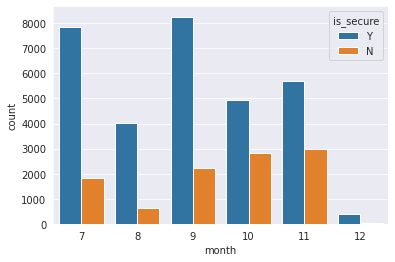

In [374]:

sns.countplot(x="month", hue="is_secure", data=df);

In [375]:
# Manual inspection, picking 50 random domains which were insecure
import random
random.sample(list(df[df["is_secure"] == "N"].domain.unique()), 50)

['creamzy',
 'ufsc',
 'mit',
 'escience',
 'amk',
 'pythontutor',
 'jobosocial',
 'gisagmaps',
 'state',
 'html',
 'argissoft',
 'scipy',
 'andrewjanowczyk',
 'emeagwali',
 'olfti',
 'okutama-action',
 'digitalglobe',
 'oregonstate',
 'sportlabs',
 'utiva',
 'allmapsoft',
 'ceur-ws',
 'sztaki',
 'uzh',
 '62.138.24.197',
 'fepsannigeria',
 'mediafire',
 'chizzy',
 'udemycoursedownloader',
 'realsrv',
 'qgistutorials',
 'flourish-project',
 'epitok',
 'mysite',
 'ez-farming',
 'online-service',
 'umass',
 'jiangyeyuan',
 'sthda',
 'bristol',
 'pulsarimagens',
 'omasports',
 'pragmaticmaster',
 'sonomavegmap',
 'cdrf',
 'evans',
 '192.168.43.1',
 'shkodrasport',
 'herokuapp',
 '85.25.236.242']

## Weekday vs Weekend browser usage

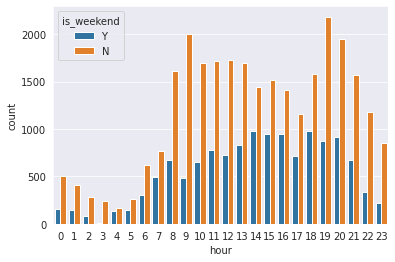

In [376]:
sns.countplot(x="hour", hue="is_weekend", data=df);

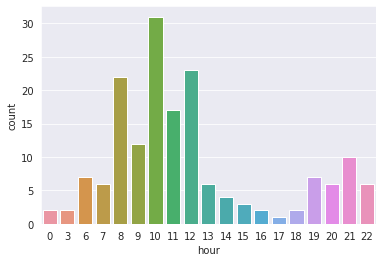

In [377]:
sns.countplot(x="hour", data=df[(df['category'] == "Doubts") & (df["month"] == 11)]);


## Category visits by month

In [378]:
matplotlib.rcParams['font.size'] = 10


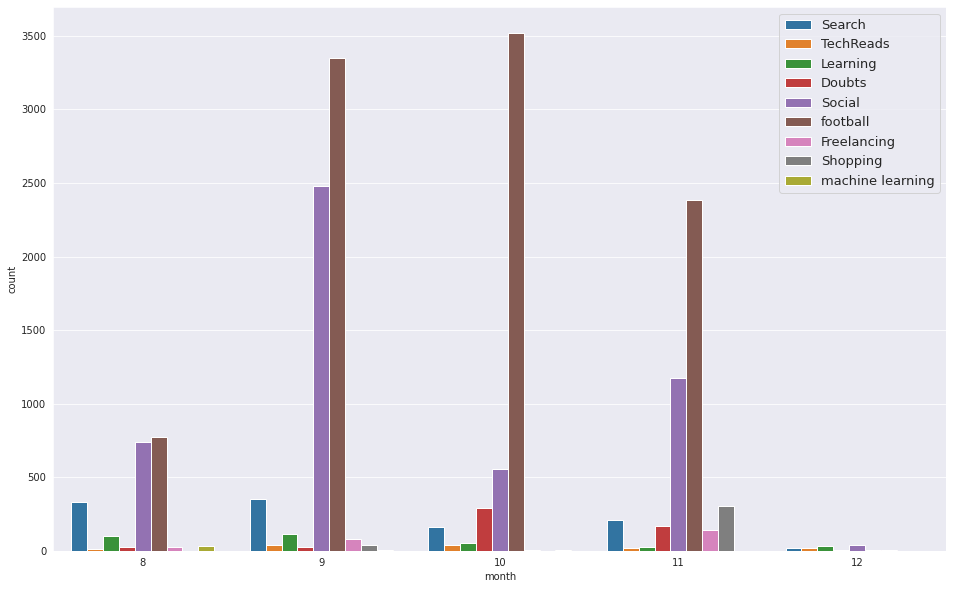

In [379]:
plt.figure(figsize = (16,10))
sns.countplot(x="month", hue="category", data=df[(df['month'] > 7) & (df["category"] != 'Other') & (df["category"] != 'Email')]);
# plt.tight_layout(pad=1);
plt.legend(loc='upper right',prop={'size': 13});


## Category visits by weekday

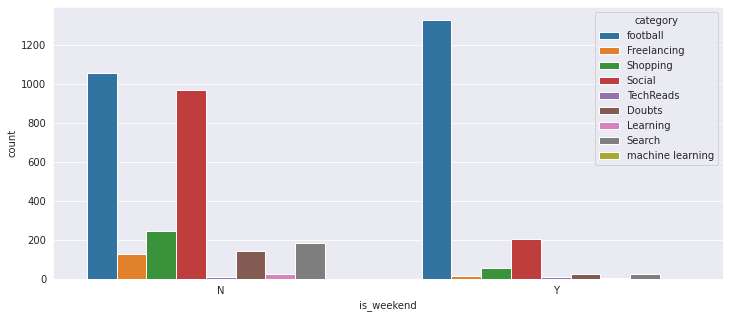

In [380]:

plt.figure(figsize = (12,5))
sns.countplot(x="is_weekend", hue="category", data=df[(df['month'] == 11) & (df["category"] != 'Other') & (df["category"] != 'Email')]);

### Browser usage over months

In [381]:
df_new = df[(df["month"] >= 11)].groupby(["hour", "date"])["domain"].nunique()
df_new = df_new.reset_index(name="count")


<AxesSubplot:xlabel='date', ylabel='hour'>

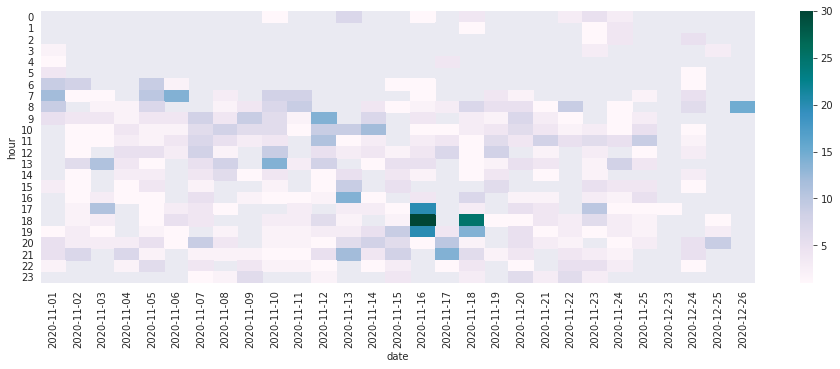

In [382]:
plt.figure(figsize = (16,5))
sns.heatmap(df_new.pivot("hour", "date", "count"), annot=False, cmap="PuBuGn")


### Youtube usage by hour

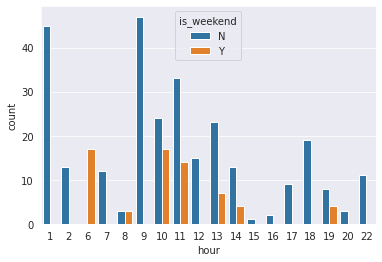

In [383]:
sns.countplot(x="hour", hue="is_weekend", data=df[((df['domain'] == "youtube")) & (df["month"] == 9)]);


### Facebook usage by hour

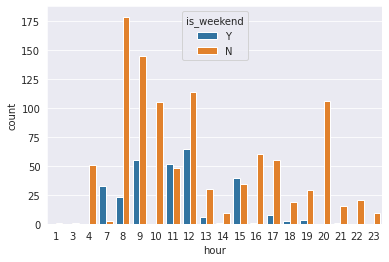

In [384]:
sns.countplot(x="hour", hue="is_weekend", data=df[((df['domain'] == "facebook")) & (df["month"])]);


### Browser visits by day of week and hour

In [385]:
df_heat = df.groupby(["hour", "day_of_week"])["domain"].size().reset_index()
df_heat2 = df_heat.pivot("hour", "day_of_week", "domain")

<AxesSubplot:xlabel='day_of_week', ylabel='hour'>

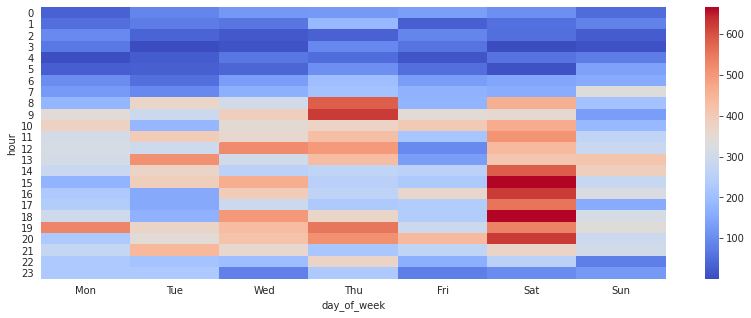

In [386]:
plt.figure(figsize = (14,5))
sns.heatmap(df_heat2[days_arr] , cmap="coolwarm")


### Filtered heatmap by shopping category sites

In [387]:
df_heat = df[df["category"] == "Social"].groupby(["hour", "day_of_week"])["category"].size().reset_index()
df_heat2 = df_heat.pivot("hour", "day_of_week", "category")

<AxesSubplot:xlabel='day_of_week', ylabel='hour'>

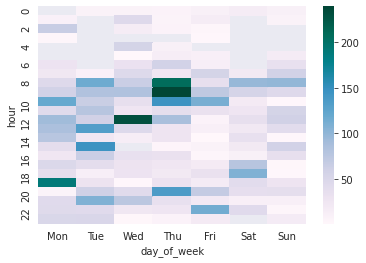

In [388]:
sns.heatmap(df_heat2[days_arr] , cmap="PuBuGn")


### Another useful visualization across all categories

In [389]:
df_cat = df[(df["month"] >= 11)].groupby(["category", "day_of_week",
                                          "hour", "domain", "is_weekend"]).size().reset_index()

<AxesSubplot:xlabel='category', ylabel='hour'>

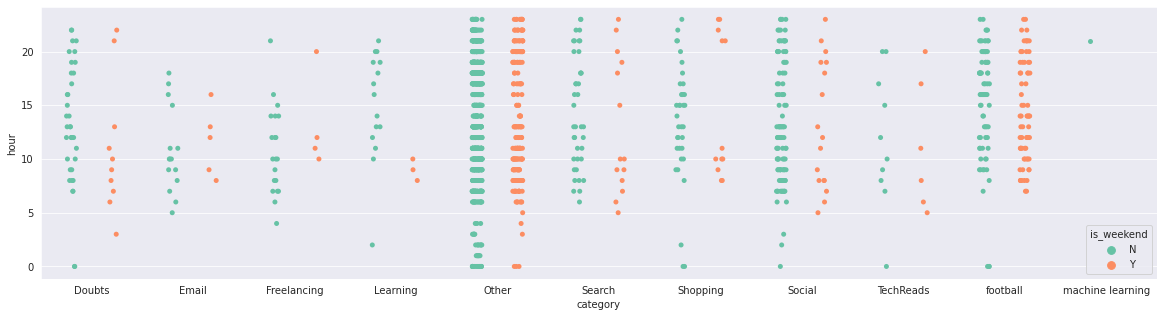

In [390]:
plt.figure(figsize = (20,5))
sns.stripplot(x="category", y="hour", hue="is_weekend",
                    data=df_cat, jitter=True, dodge=True,
                    palette="Set2")

In [391]:
pd.set_option('display.max_colwidth', -1)
df_so = df[df["domain"] == "stackoverflow"].groupby(["url", "title"]).size()
df_so = df_so.reset_index(name='count').sort_values('count',ascending=False)[["title", 'count']]

<ipython-input-391-cc9484ccf43e>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [392]:

df_so.head(10)

,title,count
87,python - Random state (Pseudo-random number) in Scikit learn - Stack Overflow,22
353,Question Limit Reached - Stack Overflow,10
357,User chuky pedro - Stack Overflow,10
363,User Ronnie Scott - Stack Overflow,8
368,Log In - Stack Overflow,7
322,python - How to validate dateField in django form - Stack Overflow,7
279,"python - Exception: Expected number, tuple of two number, list of number or StochasticParameter for cval, got <class 'bool'> - Stack Overflow",7
2,"Stack Overflow - Where Developers Learn, Share, & Build Careers",6
371,Log Out - Stack Overflow,6
24,Edit - Stack Overflow,6


In [393]:
urlretrieve('https://raw.githubusercontent.com/daerty0153/visualize-browser-history/master/images/mask.png', 'mask.png');

(-0.5, 499.5, 499.5, -0.5)

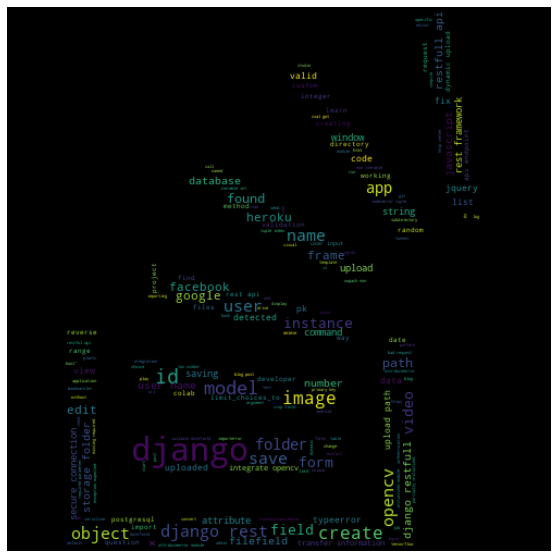

In [394]:

img = Image.open('mask.jpg')
msk = np.array(img)
title_concatenated = " ".join(df_so["title"]).lower()
stopwords = set(STOPWORDS)
more_stopwords = set(["error", "class", "file", "pandas", "stack", "column", "columns", "using", "use", "function", "value", "values", "multiple", "stack overflow", "overflow", "python"])
stopwords |= more_stopwords
wordcloud = WordCloud(max_font_size=30, stopwords=stopwords, mask=msk, background_color="black")
wordcloud.generate(title_concatenated)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [395]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
